In [28]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%cd '../HOTS'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
/home/antoine/homhots/HOTS/HOTS


In [29]:
import torch
import matplotlib.pyplot as plt
import numpy as np

In [30]:
x = torch.randint(0,34,[4000])
y = torch.randint(0,34,[4000])
p = torch.randint(0,1,[4000])
t, ind = torch.randint(0,3000,[10000]).sort()
t = torch.unique(t)
n_events = len(t)
x, y, p = x[:n_events, None], y[:n_events, None], p[:n_events, None]

events = torch.cat([x,y,t[:, None],p],dim=1)
print(events.shape)

torch.Size([2879, 4])


In [31]:
import tonic

eventset = tonic.datasets.NMNIST(save_to='../Data/',
                                train=False,
                                transform=None)
loader = tonic.datasets.DataLoader(eventset, shuffle=True)

eventonic, target = next(iter(loader))
print(torch.squeeze(eventonic).shape, eventset.ordering)

Using downloaded and verified file: ../Data/nmnist_test.zip
Extracting ../Data/nmnist_test.zip to ../Data/
torch.Size([3880, 4]) xytp


# Parameters

In [46]:
sample_space = 2
sample_events = 5
sensor_size = [34,34]
N_p = 2
n_events = n_events
tau = torch.tensor(1500)

x_index, y_index, t_index, p_index = 0, 1, 2, 3

switch_id = [0,1,3,2]

# With simple loop from get_data()

In [47]:
%%timeit
c_int = lambda n, d : ((n - 1) // d) + 1

data = torch.zeros((c_int(sensor_size[0],sample_space),
                     c_int(sensor_size[1],sample_space),
                     N_p))

X = np.zeros((c_int(n_events, sample_events), len(torch.flatten(data))))
    #y = np.zeros((c_int(n_events, sample_events), ))
for i_event in range(1, n_events):
    data *= torch.exp(-(events[i_event,t_index]-events[i_event-1,t_index])/tau)

    x_pos = events[i_event,x_index]//sample_space
    y_pos = events[i_event,y_index]//sample_space
    p = events[i_event,p_index]
    data[int(x_pos), int(y_pos), int(p)] = 1.

    if i_event % sample_events == sample_events//2:
        X[i_event//sample_events, :] = torch.flatten(data)

204 ms ± 235 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [48]:
c_int = lambda n, d : ((n - 1) // d) + 1

data = torch.zeros((c_int(sensor_size[0],sample_space),
                     c_int(sensor_size[1],sample_space),
                     N_p))

X = np.zeros((c_int(n_events, sample_events), len(torch.flatten(data))))
    #y = np.zeros((c_int(n_events, sample_events), ))
for i_event in range(1, n_events):
    data *= torch.exp(-(events[i_event,t_index]-events[i_event-1,t_index])/tau)

    x_pos = events[i_event,x_index]//sample_space
    y_pos = events[i_event,y_index]//sample_space
    p = events[i_event,p_index]
    data[int(x_pos), int(y_pos), int(p)] = 1.

    if i_event % sample_events == sample_events//2:
        X[i_event//sample_events, :] = torch.flatten(data)

(576, 578) torch.Size([2879, 4])


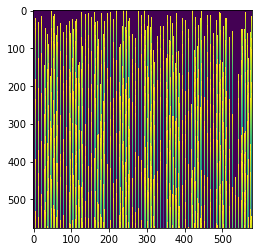

In [49]:
print(X.shape,events.shape)
plt.imshow(X)

In [50]:
if t_index==2:
    events = events[:,switch_id]
    t_index=3
    p_index=2

E = torch.ones(n_events)
R = torch.sparse.FloatTensor(events.T, E, torch.Size([34, 34, 2, 3762])).to_dense()
R = torch.flatten(R,0,2)


In [51]:
R = torch.flatten(R,0,2)

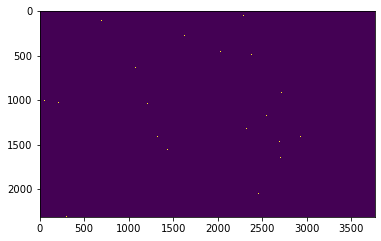

In [52]:
plt.imshow(R)

In [10]:
i = torch.LongTensor([[0, 1, 1],
                          [2, 0, 2]])
print(i.shape)
v = torch.FloatTensor([3, 4, 5])
torch.sparse.FloatTensor(i, v, torch.Size([2,3])).to_dense()

torch.Size([2, 3])


tensor([[0., 0., 3.],
        [4., 0., 5.]])

In [114]:
3762*2

7524